*Работу выполнил: студент МАИ группы М8О-407Б-18 Ильминский Никита.*

*Работу проверил: преподаватель МАИ Ахмед Самир Халид.*

# Лабораторная работа №2 по Машинному Обучению.

In [1]:
import numpy as np
import pandas as pnds
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC

## Постановка задачи

**Необходимо**:

- реализовать алгоритмы логистической регрессии, дерево решений, SVM (Метод опорных векторов) и применить их на наборах данных, подготовленных в первой лабораторной работе.
- провести анализ полученных моделей, вычислить метрики классификации. Произвести тюнинг параметров в случае необходимости. Сравнить полученные результаты с моделями реализованными в *scikit-learn*.

Найденный мною датасет представляет собой список игроков Национальной Баскетбольной Ассоциации, их статистические показатели за первый сезон в лиге (количество игр, минут, очков, реализованных бросков в среднем за игру и т.д.) и поле 'TARGET_5Yrs', значение которого равно '1.0', если игрок провел в лиге более или ровно 5 сезонов, и '0.0' в противном случае.

In [2]:
dataset = pnds.read_csv('nba_logreg.csv')
dataset.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**Задача: исходя из статистических показателей игрока в его первый сезон в лиге, определить, сможет ли этот игрок провести более или ровно 5 сезонов за свою профессиональную карьеру.**

## Подготовим датасет таким же образом, как и в первой лабораторной работе:

- удалим строки с пустыми ячейками
- преобразуем значения столбца TARGET_5Yrs из float64 в int
- выбросим ненужный признак - столбец с именами игроков (для классификации он не нужен)
- отделим друг от друга признаки (features) и метки класса (labels), а также разделим наши данные на обучающую и тестовую выборку

In [4]:
dataset = dataset.dropna()

dataset['TARGET_5Yrs'] = dataset['TARGET_5Yrs'].apply(lambda x: int(x))

dataset = dataset.drop(columns=['Name'])

features, labels = dataset.drop(columns=['TARGET_5Yrs']).to_numpy(), np.array(dataset['TARGET_5Yrs'])
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size=0.2, random_state=1234)

## Реализуем алгоритм логистической регрессии (LogReg, Logistic Regression):

In [5]:
#в качестве логистической функции используем сигмоиду
def sigmoid(x):
    return 1 / (1 + np.exp(x))

class LogReg:
    def __init__(self, learningRate, maxIters):
        self.learningRate = learningRate
        self.maxIters = maxIters
        
    def fit(self, trainFeatures, trainLabels):
        trainSize = trainFeatures.shape[0]
        featuresSize = trainFeatures.shape[1]
        
        weights = np.zeros(featuresSize + 1)
        trainFeatures_modified = np.hstack((trainFeatures, np.ones((trainSize, 1))))
        
        x = trainFeatures_modified
        y = trainLabels
        for repeat in range(maxIters):
            weights = weights + learningRate * np.dot(y - sigmoid(-np.dot(x, weights)), x)
        self.weights = weights
    
    def predict(self, testFeatures):
        testSize = testLabels.shape[0]
        classification = np.zeros(testSize)

        for i in range(testSize):
            if sigmoid(-np.dot(np.append(testFeatures[i], 1), self.weights)) < 0.5:
                classification[i] = 0
            else:
                classification[i] = 1

        return classification    

Используем метрики для оценки качества классификатора:

In [6]:
def getMetrics(trueLabels, predictions):
    classZero_true, classOne_true, classZero_false, classOne_false,  = 0, 0, 0, 0
    
    for i in range(trueLabels.shape[0]):
        if trueLabels[i] == 0 and predictions[i] == 0: classZero_true += 1
        if trueLabels[i] == 1 and predictions[i] == 0: classZero_false += 1
        if trueLabels[i] == 1 and predictions[i] == 1: classOne_true += 1
        if trueLabels[i] == 0 and predictions[i] == 1: classOne_false += 1
        
    print('Accuracy:', (classOne_true + classZero_true) / (classOne_true + classZero_true + classOne_false + classZero_false))
    print('Precision:', classOne_true / (classOne_true + classOne_false))
    print('Recall:', classOne_true / (classOne_true + classZero_false))

In [7]:
learningRate = 0.05
maxIters = 10000

LogReg = LogReg(learningRate, maxIters)
LogReg.fit(trainFeatures, trainLabels)
predictions = LogReg.predict(testFeatures)
getMetrics(testLabels, predictions)

<ipython-input-5-0f14320c4f88>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(x))


Accuracy: 0.706766917293233
Precision: 0.7371134020618557
Recall: 0.8411764705882353


Сравним нашу реализацию с тем же алгоритмом из библиотеки *sklearn*:

In [8]:
sklearnLogReg = LogisticRegression(max_iter=maxIters)
sklearnLogReg.fit(trainFeatures, trainLabels)
predictions = sklearnLogReg.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.7142857142857143
Precision: 0.7447916666666666
Recall: 0.8411764705882353


## Реализуем дерево решений (DT, Decision Tree):

In [9]:
class Node:
    def __init__(self, predictedClass):
        self.predictedClass = predictedClass
        self.featureIdx = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self, maxDepth):
        self.maxDepth = maxDepth

    def split(self, trainFeatures, trainLabels):
        trainSize = trainFeatures.shape[0]
        if trainSize <= 1:
            return None, None
        
        parentNum = [np.sum(trainLabels == i) for i in range(self.classesNum)]
        bestGiniImpurity = 1.0 - sum((n / trainSize) ** 2 for n in parentNum)
        
        bestIdx, bestThreshold = None, None
        for idx in range(self.featuresNum):
            thresholds, classes = zip(*sorted(zip(trainFeatures[:, idx], trainLabels)))
            leftNum = [0] * self.classesNum
            rightNum = parentNum.copy()
            
            for i in range(1, trainSize):
                curClass = classes[i - 1]
                leftNum[curClass] += 1
                rightNum[curClass] -= 1
                
                leftGini = 1.0 - sum((leftNum[x] / i) ** 2 for x in range(self.classesNum))
                rightGini = 1.0 - sum((rightNum[x] / (trainSize - i)) ** 2 for x in range(self.classesNum))
                giniImpurity = (i * leftGini + (trainSize - i) * rightGini) / trainSize
                
                if thresholds[i] == thresholds[i - 1]:
                    continue
                
                if giniImpurity < bestGiniImpurity:
                    bestGiniImpurity = giniImpurity
                    bestIdx = idx
                    bestThreshold = (thresholds[i] + thresholds[i - 1]) / 2
                    
        return bestIdx, bestThreshold

    def createTree(self, trainFeatures, trainLabels, curDepth=0):
        classObjectNum = [np.sum(trainLabels == i) for i in range(self.classesNum)]
        predictedClass = np.argmax(classObjectNum)
        curNode = Node(predictedClass=predictedClass)
        
        if curDepth < self.maxDepth:
            curIdx, curThreshold = self.split(trainFeatures, trainLabels)
            if curIdx is not None:
                leftIndeces = trainFeatures[:, curIdx] < curThreshold
                leftFeatures, leftLabels = trainFeatures[leftIndeces], trainLabels[leftIndeces]
                rightFeatures, rightLabels = trainFeatures[~leftIndeces], trainLabels[~leftIndeces]
                curNode.featureIdx = curIdx
                curNode.threshold = curThreshold
                curNode.left = self.createTree(leftFeatures, leftLabels, curDepth + 1)
                curNode.right = self.createTree(rightFeatures, rightLabels, curDepth + 1)
        
        return curNode

    def fit(self, trainFeatures, trainLabels):
        self.classesNum = len(set(trainLabels))
        self.featuresNum = trainFeatures.shape[1]
        self.decisionTree = self.createTree(trainFeatures, trainLabels)

    def predict(self, testFeatures):
        classification = []
        for testObject in testFeatures:
            curNode = self.decisionTree
            while curNode.left:
                if testObject[curNode.featureIdx] < curNode.threshold:
                    curNode = curNode.left
                else:
                    curNode = curNode.right
            classification.append(curNode.predictedClass)
    
        return classification

In [10]:
maxDepth = 10

DT = DecisionTree(maxDepth)
DT.fit(trainFeatures, trainLabels)
predictions = DT.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.6541353383458647
Precision: 0.7349397590361446
Recall: 0.7176470588235294


Сравним нашу реализацию с тем же алгоритмом из библиотеки *sklearn*:

In [11]:
sklearnDT = tree.DecisionTreeClassifier(max_depth=maxDepth)
resultTree = sklearnDT.fit(trainFeatures, trainLabels)
predictions = sklearnDT.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.6729323308270677
Precision: 0.7426900584795322
Recall: 0.7470588235294118


Полученное при помощи *sklearn* дерево решений можно вывести графически:

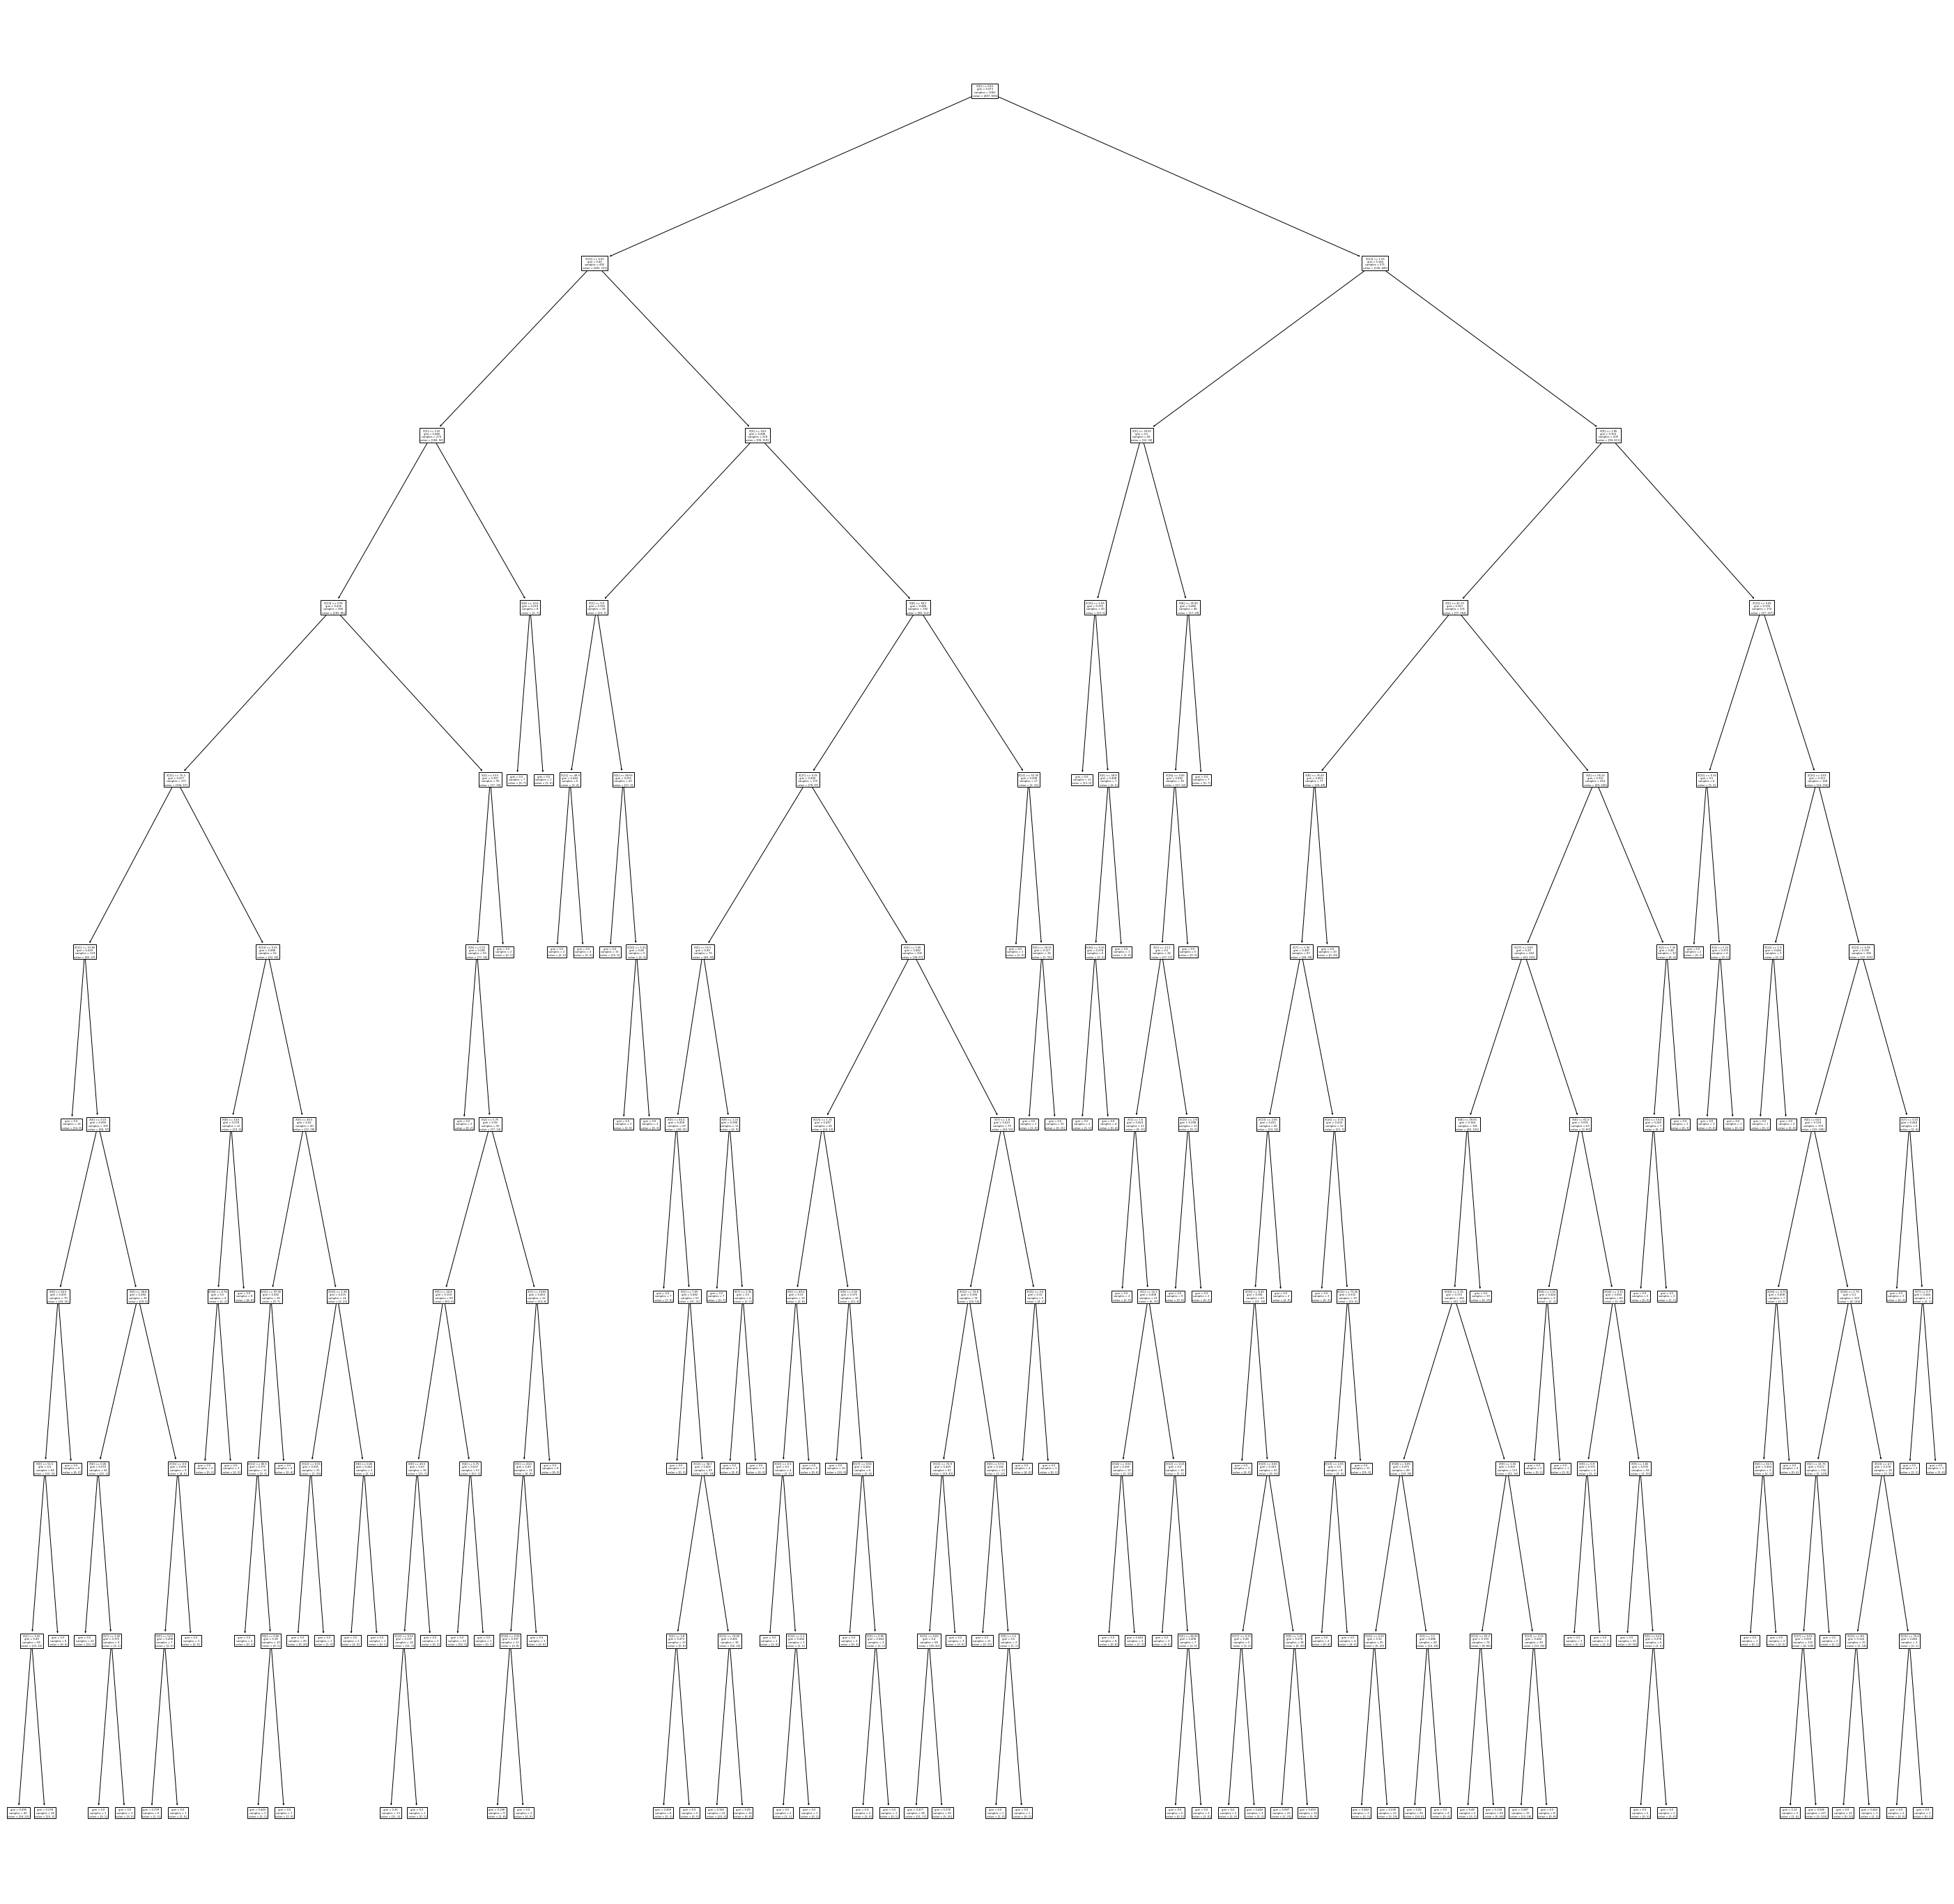

In [12]:
plt.figure(figsize=(50,50))
tree.plot_tree(resultTree)
plt.show()

## Реализуем Метод опорных векторов (SVM, support vector machine):

In [13]:
class SupportVectorMachine:
    def __init__(self, learningRate, lambdaValue, iterNum):
        self.learningRate = learningRate
        self.lambdaValue = lambdaValue
        self.iterNum = iterNum

    def fit(self, trainFeatures, trainLabels):
        trainSize = trainFeatures.shape[0]
        featuresSize = trainFeatures.shape[1]
        self.W = np.zeros(featuresSize)
        self.b = 0
        trainLabels_modified = np.where(trainLabels <= 0, -1, 1)

        for i in range(self.iterNum):
            for j, x in enumerate(trainFeatures):
                if trainLabels_modified[j] * ((x @ self.W) - self.b) >= 1:
                    self.W -= self.learningRate * (2 * self.lambdaValue * self.W)
                else:
                    self.W -= self.learningRate * (2 * self.lambdaValue * self.W - np.dot(x, trainLabels_modified[j]))
                    self.b -= self.learningRate * trainLabels_modified[j]

    def predict(self, testfeatures):
        testValue = np.dot(testfeatures, self.W) - self.b
        classification = np.where(testValue >= 0, 1, 0)
        
        return classification

In [14]:
learningRate = 0.05
lambdaValue = 0.01
iterNum = 1000

SVM = SupportVectorMachine(learningRate, lambdaValue, iterNum)
SVM.fit(trainFeatures, trainLabels)
predictions = SVM.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.6954887218045113
Precision: 0.7192118226600985
Recall: 0.8588235294117647


Сравним нашу реализацию с тем же алгоритмом из библиотеки *sklearn*:

In [15]:
sklearnSVM = SVC()
sklearnSVM.fit(trainFeatures, trainLabels)
predictions = sklearnSVM.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.7105263157894737
Precision: 0.7384615384615385
Recall: 0.8470588235294118


# Выводы:

Точности реализованных классификаторов и их вариантов из библиотеки *sklearn* практически совпадают, что хорошо, однако, учитывая опыт предудыщей лабораторной работы и полученные в этой работе значения метрик, можно сделать вывод, что для решения задачи классификации данного датасета, вероятнее всего, можно использовать те же самые алгоритмы обучения, но с уже больше проработанными данными (например, можно выделить наиболее значимые переменные, нормализовать их значения). Также стоит отметить, что результаты точности, полученные другими людьми для этого же датасета (их решения я нашел на сайте, откуда брал сам набор данных), тоже находятся в пределах 68-70 %, поэтому причина таких значений - специфика датасета.

Несмотря на это, я получил полезный опыт разработки классификаторов, изучил принципы их работы и познакомился с мощной библиотекой машинного обучения *scikit-learn*, которая, вероятно, сможет помочь мне в дальнейшей работе.